MAL1Y - Assignment 1 - Airbnb Copenhagen

In [2]:
import pandas as pd
import numpy as np


In [3]:
listings = pd.read_csv("listings.csv")
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,...,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,...,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,...,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220924142144,2022-09-25,city scrape,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,...,5.00,4.87,4.80,NaN,f,1,1,0,0,0.16
4,31094,https://www.airbnb.com/rooms/31094,20220924142144,2022-09-24,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,https://www.airbnb.com/rooms/653494030951422457,20220924142144,2022-09-25,previous scrape,Top-floor Villa Apartment in the Heart of Hell...,Family apartment located on the 1st floor of a...,The apartment is located one block from Strand...,https://a0.muscache.com/pictures/miso/Hosting-...,465189427,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
13811,647809303952891559,https://www.airbnb.com/rooms/647809303952891559,20220924142144,2022-09-25,previous scrape,Dejligt lille hus med flere hyggekroge ude og ...,Lille villa i roligt kvarter 15 min fra Københ...,"Nice green areas, football field, lake, playgr...",https://a0.muscache.com/pictures/b466ccb0-cef0...,4862421,...,5.00,4.67,5.00,NaN,f,1,1,0,0,1.01
13812,650819220455514228,https://www.airbnb.com/rooms/650819220455514228,20220924142144,2022-09-25,previous scrape,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,"Smuk og hyggelig lejlighed tæt på Hvidovre st,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,134647873,...,5.00,4.67,5.00,NaN,t,1,1,0,0,1.27
13813,658612163688161695,https://www.airbnb.com/rooms/658612163688161695,20220924142144,2022-09-25,previous scrape,Cosy apartment with a great view in Copenhagen,Well located apartment close to grocery stores...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,256903668,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [4]:
# 1. Remove all the redundant columns
columns_to_keep = (["id", "name", "host_id", "host_name", "neighbourhood_cleansed", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "last_review", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", "calculated_host_listings_count", "availability_365"])
listings = listings[columns_to_keep]
listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,Top-floor Villa Apartment in the Heart of Hell...,465189427,Martine,sterbro,55.732840,12.572370,Entire home/apt,"$1,250.00",14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0
13813,658612163688161695,Cosy apartment with a great view in Copenhagen,256903668,Sam,Brnshj-Husum,55.730971,12.487993,Entire home/apt,$850.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [5]:
# 2. Remove all rows where number_of_reviews = 0
listings = listings[listings['number_of_reviews']  != 0 ]
listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,$856.00,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"$1,050.00",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12170 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12170 non-null  int64  
 1   name                            12170 non-null  object 
 2   host_id                         12170 non-null  int64  
 3   host_name                       12169 non-null  object 
 4   neighbourhood_cleansed          12170 non-null  object 
 5   latitude                        12170 non-null  float64
 6   longitude                       12170 non-null  float64
 7   room_type                       12170 non-null  object 
 8   price                           12170 non-null  object 
 9   minimum_nights                  12170 non-null  int64  
 10  number_of_reviews               12170 non-null  int64  
 11  last_review                     12170 non-null  object 
 12  review_scores_rating            12170

In [7]:
listings = listings.dropna()


In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12126 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12126 non-null  int64  
 1   name                            12126 non-null  object 
 2   host_id                         12126 non-null  int64  
 3   host_name                       12126 non-null  object 
 4   neighbourhood_cleansed          12126 non-null  object 
 5   latitude                        12126 non-null  float64
 6   longitude                       12126 non-null  float64
 7   room_type                       12126 non-null  object 
 8   price                           12126 non-null  object 
 9   minimum_nights                  12126 non-null  int64  
 10  number_of_reviews               12126 non-null  int64  
 11  last_review                     12126 non-null  object 
 12  review_scores_rating            12126

In [9]:
# 3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

listings.loc[:,'neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].str.replace('ae', 'æ')
listings.loc[:,'neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].str.replace('oe', 'ø')
listings.loc[:,'neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].str.replace('aa', 'å')

In [10]:
listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,$856.00,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"$1,050.00",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


In [11]:
listings.loc[:,'price'] = listings['price'].str.replace('$', 'DKK')

In [12]:
listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,DKK898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"DKK2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"DKK3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,DKK725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"DKK1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,DKK856.00,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"DKK1,050.00",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,DKK450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,DKK400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


In [13]:
#4 create a fitting word cloud based on the name column. remove any non-descriptive words

import matplotlib.pyplot as plt
from wordcloud import WordCloud


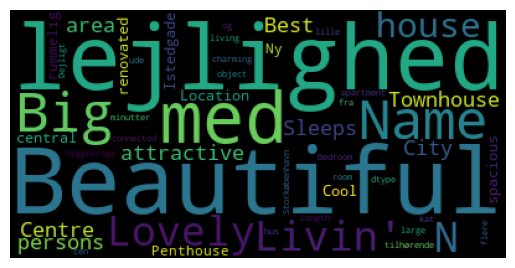

In [14]:
names_to_use = listings['name']
names_to_use = names_to_use.apply(lambda x: x.replace('Copenhagen',''))

wordcloud = WordCloud().generate(str(names_to_use))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

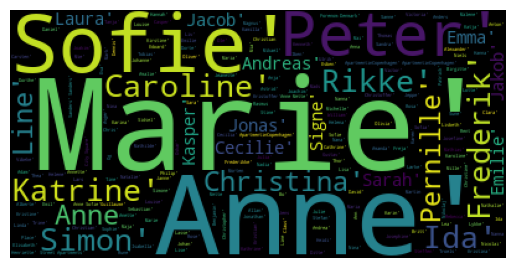

In [15]:
# 5. create a word cloud of the names of the hosts

danish_names = ['PigenavneAnne',
 'Mette',
 'Kirsten',
 'Hanne',
 'Anna',
 'Helle',
 'Susanne',
 'Maria',
 'Lene',
 'Marianne',
 'Camilla',
 'Lone',
 'Louise',
 'Pia',
 'Charlotte',
 'Tina',
 'Gitte',
 'Jette',
 'Bente',
 'Julie',
 'DrengenavnePeter',
 'Michael',
 'Lars',
 'Jens',
 'Thomas',
 'Henrik',
 'Søren',
 'Christian',
 'Martin',
 'Jan',
 'Morten',
 'Jesper',
 'Anders',
 'Niels',
 'Mads',
 'Rasmus',
 'Per',
 'Mikkel',
 'Hans',
 'Kim',
 'EfternavneNielsen',
 'Jensen',
 'Hansen',
 'Andersen',
 'Pedersen',
 'Christensen',
 'Larsen',
 'Sørensen',
 'Rasmussen',
 'Jørgensen',
 'Petersen',
 'Madsen',
 'Kristensen',
 'Olsen',
 'Thomsen',
 'Christiansen',
 'Poulsen',
 'Johansen',
 'Møller',
 'Mortensen']

def remove_non_danish_names(text,names_for_reference):
    for name in names_for_reference:
        if text == name:
            text = text.replace(name,'')
    return text.strip()

host_names = listings['host_name']
host_names_to_use = host_names.apply(lambda x: remove_non_danish_names(x,danish_names))

host_names_wordcloud = WordCloud().generate(str(host_names_to_use.to_list()))

plt.imshow(host_names_wordcloud)
plt.axis("off")
plt.show()

In [16]:
# 6 create a new column using bins of price

bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7', 'Bin 8', 'Bin 9', 'Bin 10', 'Bin 11']


listings['price'] = listings['price'].str.replace('[^\d.]', '', regex=True).astype(float)
listings['price_bin'] = pd.cut(listings['price'], bins=bin_edges, labels=bin_labels, right=False)

listings


C:\Users\Gruia\AppData\Local\Temp\ipykernel_5764\1436308332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['price'] = listings['price'].str.replace('[^\d.]', '', regex=True).astype(float)
C:\Users\Gruia\AppData\Local\Temp\ipykernel_5764\1436308332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['price_bin'] = pd.cut(listings['price'], bins=bin_edges, labels=bin_labels, right=False)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bin
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,Bin 1
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,Bin 3
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,Bin 4
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,Bin 1
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,Bin 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,856.0,6,...,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0,Bin 1
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,1050.0,2,...,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0,Bin 2
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,450.0,3,...,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0,Bin 1
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,400.0,1,...,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0,Bin 1


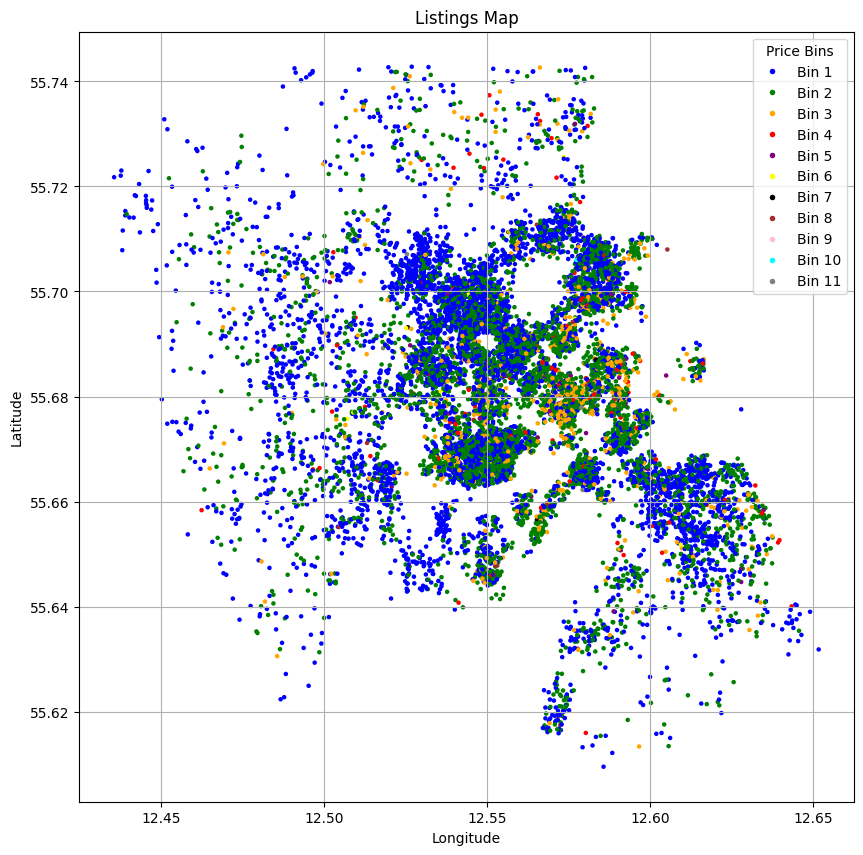

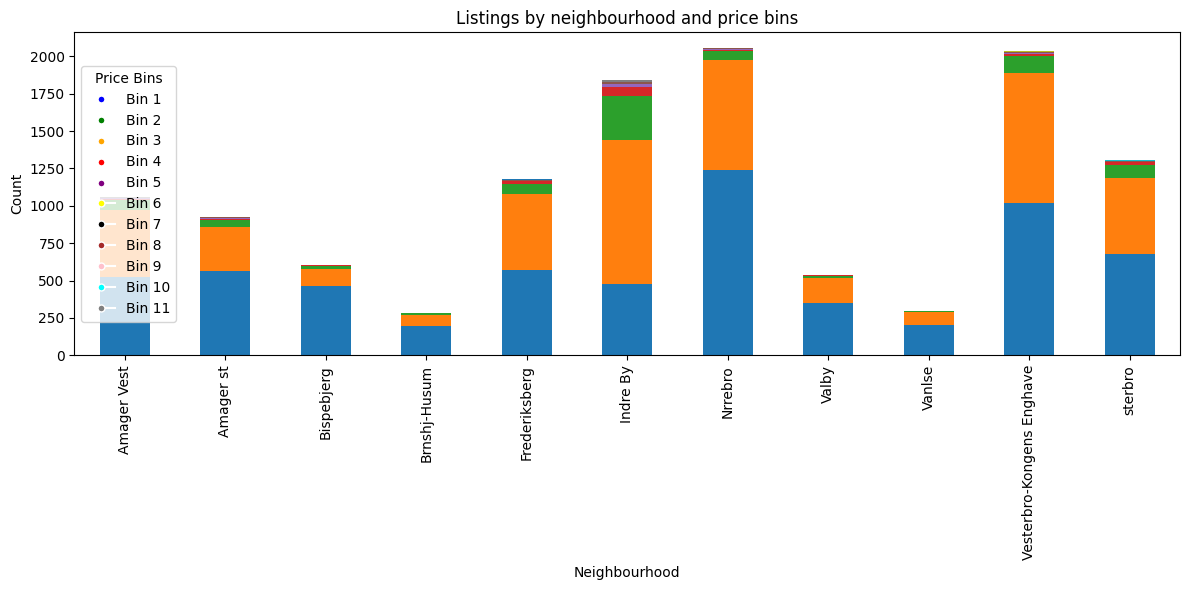

In [17]:
# 7 using non-scaled versions of latitude and longitude, plot the listings data on a map

# dictionary to map price bin labels to color codes
price_bin_color = {
        'Bin 1': 'blue',
        'Bin 2': 'green',
        'Bin 3': 'orange',
        'Bin 4': 'red',
        'Bin 5': 'purple',
        'Bin 6': 'yellow',
        'Bin 7': 'black',
        'Bin 8': 'brown',
        'Bin 9': 'pink',
        'Bin 10': 'cyan',
        'Bin 11': 'gray'
    }


plt.figure(figsize=(10, 10)) # figure size

# create the scatter plot using longitude and latitude from data frame to position each poit on the map
plt.scatter(listings['longitude'], listings['latitude'], c=listings['price_bin']
            .apply(lambda x: price_bin_color.get(x, 'gray')), s=5) 

plt.title('Listings Map') # title
plt.xlabel('Longitude') # label for x axis
plt.ylabel('Latitude') # label for y axis

legend_labels = price_bin_color.keys() 
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=5, 
                            markerfacecolor=price_bin_color[label]) for label in legend_labels]
plt.legend(handles=legend_handles, title='Price Bins', loc='upper right') # create legend and position it

plt.grid(True) # adding a grid to the map

plt.figure(figsize=(12, 6))

# group the data frame by neigbourhood_cleansed and price_bin to calculate the count of each listing in each combination
neighborhood_price_counts = listings.groupby(['neighbourhood_cleansed', 'price_bin']).size().unstack(fill_value=0)
# create a stacked bar chart using the previous variable
neighborhood_price_counts.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Listings by neighbourhood and price bins')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(handles=legend_handles, title='Price Bins', loc='center left')

# show both plots
plt.show()

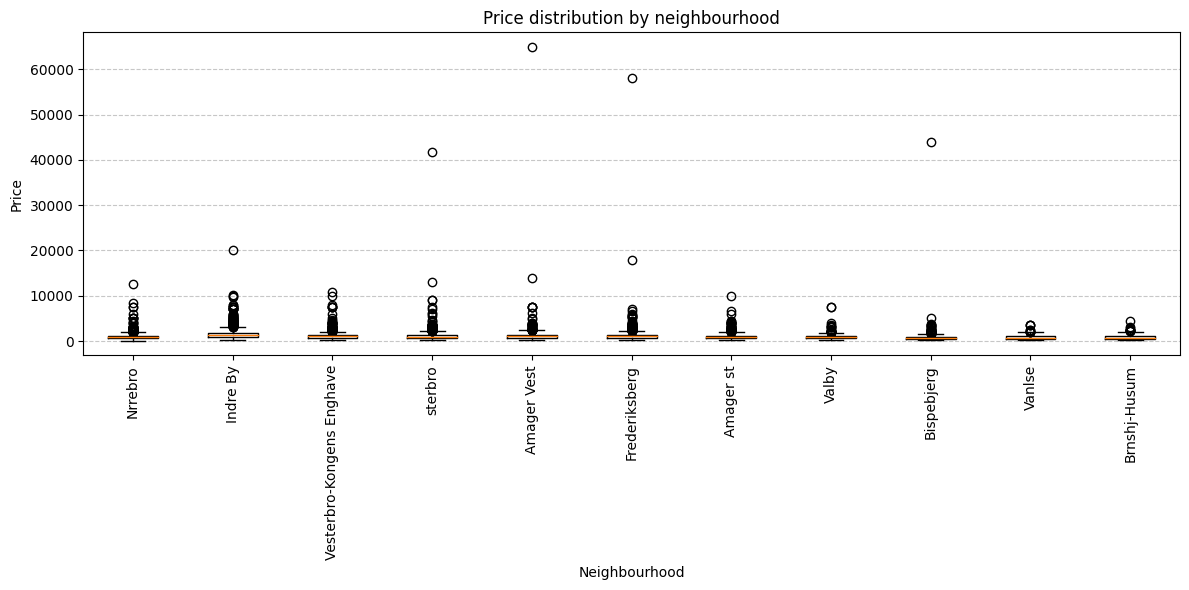

In [19]:
# 8 create boxplots where you have the neighbourhood on the x-axis and price on the y-axis

plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Price distribution by neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# create the boxplot
# iterate over unique neighbourhoods, for each neigbourhood select the prices for listings, which will be used as input to 
# create the boxplot
plt.boxplot([listings[listings['neighbourhood_cleansed'] == neighbourhood]['price'] for neighbourhood in listings['neighbourhood_cleansed'].unique()],
            labels=listings['neighbourhood_cleansed'].unique())

plt.tight_layout()
plt.show()

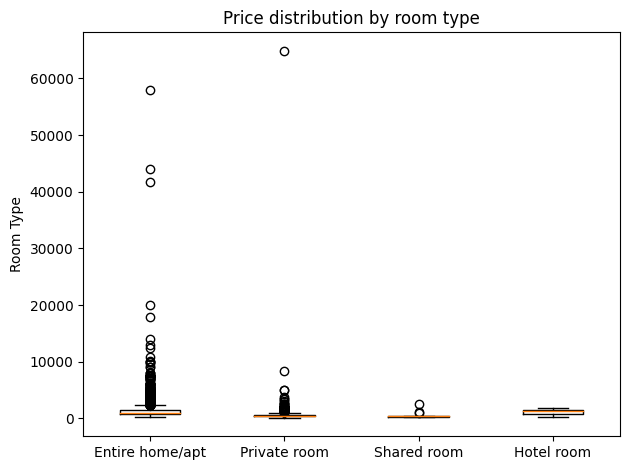

In [21]:
# move different variables into the y-axis
plt.ylabel('Room Type')
plt.title('Price distribution by room type')

plt.boxplot([listings[listings['room_type'] == room]['price'] for room in listings['room_type'].unique()],
            labels=listings['room_type'].unique())

plt.tight_layout()
plt.show()

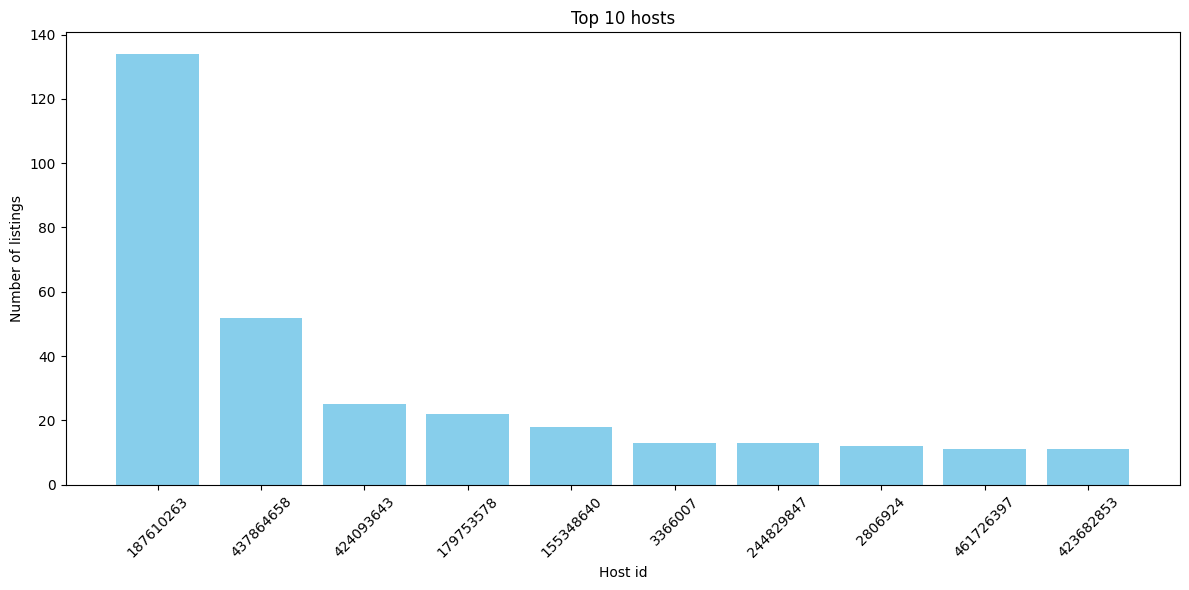

In [23]:
#9 create a bar chart of the hosts with the top ten most listings

host_listings_count = listings['host_id'].value_counts().reset_index()
host_listings_count.columns = ['Host ID', 'Count']

# sort the data by count in descending order and select the top 10 hosts
top_10_hosts = host_listings_count.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_hosts['Host ID'].astype(str), top_10_hosts['Count'], color='skyblue')
plt.title('Top 10 hosts')
plt.xlabel('Host id')
plt.ylabel('Number of listings')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [25]:
# 10  do a descriptive analysis of the neighborhoods

descriptive_stats = listings.groupby(['neighbourhood_cleansed', 'room_type'])[['price', 'number_of_reviews']].describe()

descriptive_stats

price                            \
                                            count         mean          std   
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  1234.226623   832.696891   
                          Private room      148.0  1032.966216  5299.018095   
                          Shared room         2.0  1051.500000   112.429978   
Amager st                 Entire home/apt   791.0  1093.584071   721.982284   
                          Hotel room          3.0  1296.000000   211.184753   
                          Private room      129.0   549.325581   293.995992   
                          Shared room         1.0  2575.000000          NaN   
Bispebjerg                Entire home/apt   508.0   992.592520  1981.580545   
                          Private room       95.0   488.978947   353.674089   
                          Shared room         1.0   198.000000          NaN   
Brnshj-Husum              Entire home/apt   216.0  1014.995370   555.669548   
                          Private room       67.0   445.552239   201.631624   
                          Shared room         2.0   211.500000    16.263456   
Frederiksberg             Entire home/apt  1044.0  1292.472222  1958.802772   
                          Private room      133.0   621.706767   567.611220   
Indre By                  Entire home/apt  1702.0  1642.387192  1072.616232   
                          Hotel room         10.0  1077.200000   654.255098   
                          Private room      128.0   698.984375   380.070466   
                          Shared room         4.0   292.000000    67.577116   
Nrrebro                   Entire home/apt  1889.0  1047.742192   583.703218   
                          Private room      165.0   650.121212   760.270040   
                          Shared room         3.0   324.666667   130.481161   
Valby                     Entire home/apt   450.0  1017.968889   635.434691   
                          Private room       89.0   498.157303   288.616366   
Vanlse                    Entire home/apt   254.0   954.425197   496.658320   
                          Private room       44.0   413.409091   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  1181.435119   698.122481   
                          Private room      221.0   574.366516   295.726896   
                          Shared room         2.0   330.500000   113.844192   
sterbro                   Entire home/apt  1174.0  1248.551107  1438.908216   
                          Private room      130.0   605.461538   437.259030   
                          Shared room         1.0   469.000000          NaN   

                                                                             \
                                              min      25%     50%      75%   
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   250.0   814.00  1050.0  1480.00   
                          Private room      200.0   400.00   500.0   655.00   
                          Shared room       972.0  1011.75  1051.5  1091.25   
Amager st                 Entire home/apt   240.0   700.00   900.0  1200.00   
                          Hotel room       1149.0  1175.00  1201.0  1369.50   
                          Private room      135.0   400.00   471.0   600.00   
                          Shared room      2575.0  2575.00  2575.0  2575.00   
Bispebjerg                Entire home/apt   235.0   600.00   800.0  1000.00   
                          Private room      143.0   300.00   400.0   528.50   
                          Shared room       198.0   198.00   198.0   198.00   
Brnshj-Husum              Entire home/apt   250.0   655.75   900.0  1250.00   
                          Private room      145.0   320.00   400.0   500.00   
                          Shared room       200.0   205.75   211.5   217.25   
Frederiksberg 

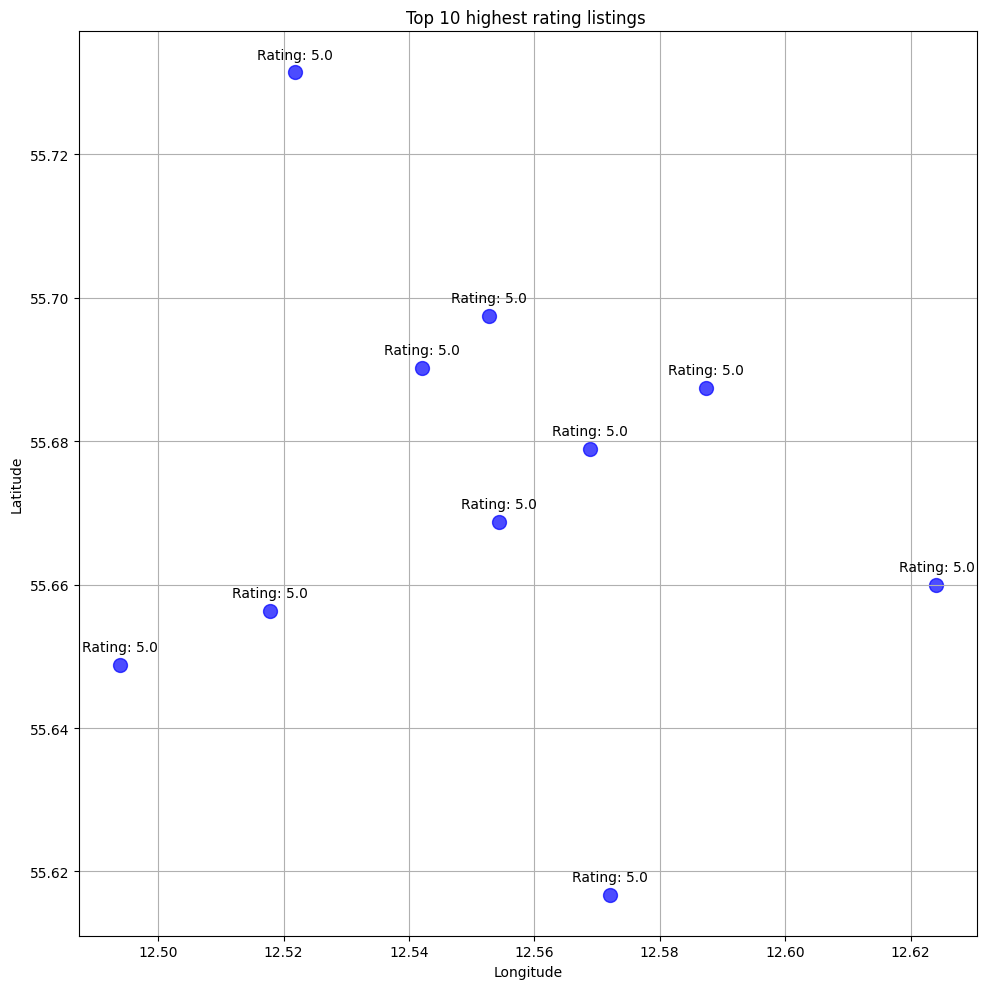

In [26]:
# 11 supply a list of the top 10 highest rated listings and visualize them on a map
top_10_listings = listings.sort_values(by='review_scores_rating', ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.scatter(top_10_listings['longitude'], top_10_listings['latitude'], s=100, c='blue', marker='o', alpha=0.7)

# Set axis labels and a title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 10 highest rating listings ')

# Annotate each point with the rating
for _, row in top_10_listings.iterrows():
    plt.annotate(f'Rating: {row["review_scores_rating"]}', (row['longitude'], row['latitude']), textcoords="offset points", xytext=(0, 10), ha='center')

# Display the scatterplot
plt.grid(True)
plt.tight_layout()
plt.show()
